In [1]:
import re
import random
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import gensim
import spacy
import string
from nltk.tokenize import word_tokenize
from gensim.parsing.preprocessing import preprocess_string
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [2]:
quotes_df = pd.read_csv(r'C:\Users\avitr\Downloads\quotes_dataset.csv')

In [3]:
quotes_df = quotes_df.iloc[:, [0,1,2]]
quotes_df.columns = ['text', 'author', 'tags']            
quotes_df.head(5)

,text,author,tags
0,You've gotta dance like there's nobody watchin...,William W. Purkey,"dance, heaven, hurt, inspirational, life, love..."
1,You know you're in love when you can't fall as...,Dr. Seuss,"attributed-no-source, dreams, love, reality, s..."
2,A friend is someone who knows all about you an...,Elbert Hubbard,"friend, friendship, knowledge, love"
3,Darkness cannot drive out darkness: only light...,"Martin Luther King Jr., A Testament of Hope: T...","darkness, drive-out, hate, inspirational, ligh..."
4,We accept the love we think we deserve.,"Stephen Chbosky, The Perks of Being a Wallflower","inspirational, love"


In [4]:
# cleaning and preprocessing
text = quotes_df['text'][:50000].apply(lambda x: preprocess_string(x)).to_list()

In [5]:
len(quotes_df)

499708

# Word2vec

In [6]:
model =  gensim.models.Word2Vec(sentences = text,
                               size=100,
                               window=2,
                               workers=8,
                               min_count=2,
                               seed=42,
                               iter= 50)

# model.save("word2vec.model")
model.wv.save_word2vec_format('Word2vec_100d.txt')

In [7]:
# How to load:
from gensim.models import KeyedVectors
w2v = KeyedVectors.load_word2vec_format('Word2vec_100d.txt')

In [8]:
lst = []
for line in text:
    t = np.zeros(100)
    for word in line:
        t = t + (w2v[word] if word in list(model.wv.vocab) else np.random.rand(100))
    lst.append(t/len(line))

In [9]:
X = np.array(lst)
X[np.isnan(X)] = 0

# Kmeans clustering- set value of K here

In [10]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
k = 4
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

KMeans(n_clusters=4)

In [11]:
y_pred = kmeans.predict(X)

# Tsne

In [12]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1, perplexity=50)  # Changed perplexity from 100 to 50 per FAQ
X_embedded = tsne.fit_transform(X)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 50000 samples in 0.007s...
[t-SNE] Computed neighbors for 50000 samples in 57.134s...
[t-SNE] Computed conditional probabilities for sample 1000 / 50000
[t-SNE] Computed conditional probabilities for sample 2000 / 50000
[t-SNE] Computed conditional probabilities for sample 3000 / 50000
[t-SNE] Computed conditional probabilities for sample 4000 / 50000
[t-SNE] Computed conditional probabilities for sample 5000 / 50000
[t-SNE] Computed conditional probabilities for sample 6000 / 50000
[t-SNE] Computed conditional probabilities for sample 7000 / 50000
[t-SNE] Computed conditional probabilities for sample 8000 / 50000
[t-SNE] Computed conditional probabilities for sample 9000 / 50000
[t-SNE] Computed conditional probabilities for sample 10000 / 50000
[t-SNE] Computed conditional probabilities for sample 11000 / 50000
[t-SNE] Computed conditional probabilities for sample 12000 / 50000
[t-SNE] Computed conditional probabilities for s

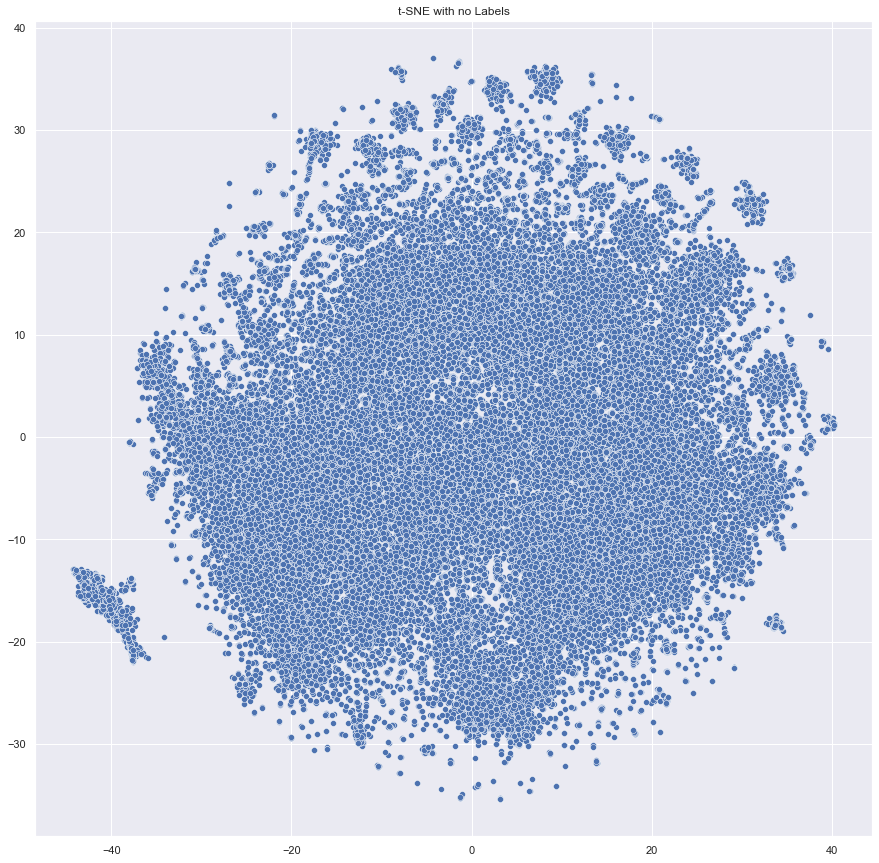

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", 1)

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], palette=palette)
plt.title('t-SNE with no Labels')
plt.show()

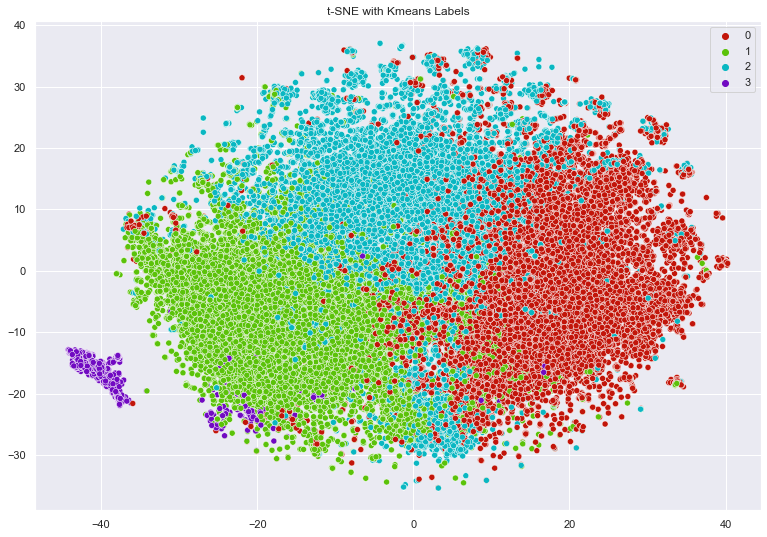

In [14]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(13,9)})

# colors
palette = sns.hls_palette(k, l=.4, s=.9)

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title('t-SNE with Kmeans Labels')
plt.show()